# การเตรียมข้อมูล

ภาพรวม

In [310]:
import pandas as pd
GDP_data =  pd.read_csv('GDP.csv', header=4)
GDP_data.rename(columns={'Unnamed: 0': 'Year' ,'Gross domestic product with Statistical discrepancy' : 'GDP'}, inplace=True)
inter_trade = pd.read_csv('international trade.csv', header=5)

In [311]:
GDP = GDP_data.iloc[range(5, 26, 5),[0,13]].reset_index(drop=True)
GDP['GDP'] = pd.to_numeric(GDP['GDP'].str.replace(',', ''))

GDP.iloc[0,0]='2563'
GDP.iloc[1,0]='2564'
GDP.iloc[2,0]='2565'
GDP.iloc[3,0]='2566'
GDP.iloc[4,0]='2567'

GDP


,Year,GDP
0,2563,15661291
1,2564,16186634
2,2565,17377997
3,2566,17954668
4,2567,18582671


In [312]:
year_trade = inter_trade[inter_trade['Item'] == 'Summary (Jan-Dec.)']

year_trade = pd.DataFrame({
    'Year': ['2563', '2564','2565','2566','2567'],
    'Export': [year_trade.iloc[0, 1], year_trade.iloc[0, 4],year_trade.iloc[0, 7], year_trade.iloc[0, 10],year_trade.iloc[0, 13]],
    'Import': [year_trade.iloc[0, 2], year_trade.iloc[0, 5],year_trade.iloc[0, 8], year_trade.iloc[0, 11],year_trade.iloc[0, 14]],
    'Balance of Trade': [year_trade.iloc[0, 3], year_trade.iloc[0, 6],year_trade.iloc[0, 9], year_trade.iloc[0, 12],year_trade.iloc[0, 15]],
})


year_trade.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              5 non-null      object 
 1   Export            5 non-null      float64
 2   Import            5 non-null      float64
 3   Balance of Trade  5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 292.0+ bytes


In [313]:
data_inter_trade = pd.merge(
    GDP,
    year_trade,
    left_on='Year',
    right_on='Year'
)

data_inter_trade

# 65 >> ราคาพลังงานสูงขึ้น

,Year,GDP,Export,Import,Balance of Trade
0,2563,15661291,7183567.61,6476267.43,707300.18
1,2564,16186634,8568939.92,8540762.66,28177.26
2,2565,17377997,9957072.66,10569641.89,-612569.24
3,2566,17954668,9827324.58,10067743.29,-240418.71
4,2567,18582671,10555970.62,10851436.19,-295465.58


การนำเข้า

In [314]:
Imports19_22 =  pd.read_csv('Imports19_22.csv', header=6).drop('2019', axis=1)
Imports22_24 =  pd.read_csv('Imports22_24.csv', header=6)
Imports19_22_update = Imports19_22.iloc[:391, 0:3].rename(columns={'Unnamed: 0': 'Item','2020' : '2563','2021' : '2564'})
Imports22_24_update = Imports22_24.iloc[:391, 0:4].rename(columns={'Unnamed: 0': 'Item','2022' : '2565','2023' : '2566','2024' : '2567'})


In [315]:
data_Imports = pd.merge(
    Imports19_22_update,
    Imports22_24_update,
    left_on='Item',
    right_on='Item'
)

data_Imports

,Item,2563,2564,2565,2566,2567
0,Total imports,6476267.43,8540762.66,10569641.89,10067743.29,10851436.19
1,1. Fuel lubricants,849537.57,1258025.71,2101011.88,1827749.96,1740634.84
2,1.1 Crude oil,504683.05,753463.05,1261981.29,1123134.70,1114333.77
3,1.2 Finished oils,103397.96,171699.50,201483.76,151932.05,133912.98
4,1.2.1 Benzine oil,17532.27,14906.08,14760.97,23164.42,865.46
...,...,...,...,...,...,...
386,6.1.3 Other munitions used in official services,0.00,0.00,0.00,0.00,1800.00
387,6.2 Special transaction,0.00,0.00,0.00,0.00,0.00
388,6.3 Others,260.25,432.93,119720.32,126225.50,146370.29
389,6.3.1 Waste,NaN,NaN,96.22,62.66,84.08


In [316]:
data_Imports['Category'] = ''

for i in range(len(data_Imports)):
    key = data_Imports.loc[i, 'Item'].split('.')[0]


    if key == '1' :
        category = 'Fuel lubricants'
    elif key == '2':
        category = 'Capital goods'
    elif key == '3':
        category = 'Raw materials and intermediate products'
    elif key == '4':
        category = 'Consumer goods'
    elif key == '5':
        category = 'Vehicles and transport accessories'
    elif key == '6':
        category = 'Arms munitions used in official services and other goods'
    else:
        category = 'N/A'

    data_Imports.loc[i, 'Category'] = category

data_Imports.loc[1, 'Category'] = 'N/A'
data_Imports.loc[14, 'Category'] = 'N/A'
data_Imports.loc[101, 'Category'] = 'N/A'
data_Imports.loc[234, 'Category'] = 'N/A'
data_Imports.loc[357, 'Category'] = 'N/A'
data_Imports.loc[382, 'Category'] = 'N/A'



In [317]:
DOC_SUB = """
    1.1 Crude oil
    1.2 Finished oils
    1.3 Natural gas
    1.4 Coal
    1.5 Other fuel
    2.1 Live animals and plants, for pure-bred breeding
    2.2 Metal manufactures
    2.3 Rubber manufactures
    2.4 Machinery and parts
    2.5 Electrical machinery and parts
    2.6 Computers, parts and accessories
    2.7 Scientific, medical, testing appliances and instruments
    2.8 Cameras, lenses and photographic, cinematographic instruments
    2.9 Aeroplanes, gliders, instruments and parts
    2.10 Ships, boats and floating structures
    2.11 Railway, equipment and parts
    3.1 Fresh aquatic animals, chilled, frozen, processed and instant
    3.2 Vegetables and vegetable products
    3.3 Animals and animal products
    3.4 Pulp, waste and scrap of paper
    3.5 Paper and paper products
    3.6 Wood in rough, sawn or chipped wood and products
    3.7 Yarn and fibers
    3.8 Fabrics
    3.9 Chemicals
    3.10 Plastic products
    3.11 Jewellery including silver bars and gold
    3.12 Mineral and mineral products
    3.13 Iron, steel and products
    3.14 Other metal ores, metal waste scrap, and products
    3.15 Cathode-ray tubes and parts
    3.16 Articles of rubber
    3.17 Glass and products thereof
    3.18 Fertilizer and pesticide
    3.19 Photographic film, cinematographic film and chemical preparations for photographic uses
    3.20 Cement
    3.21 Cement, asbestos, mica and products thereof
    3.22 Ceramic products
    3.23 Stranded wire and cable
    3.24 Electrical, electronic equipment and parts thereof
    3.25 Other raw materials and semifinished products
    4.1 Live animals, not for breeding"
    4.2 Milk and daily products
    4.3 Preparations for infant feeding
    4.4 Rice and products of flour
    4.5 Fruits, vegetables, fruit and vegetable preparations
    4.6 Edible meat
    4.7 Coffee, tea and spices"
    4.8 Beverages, mineral water, aerated water and spirits
    4.9 Dessert and chocolate
    4.10 Other food products
    4.11 Tobacco products
    4.12 Soap, detergent and cosmetic
    4.13 Clothes, footwear and other textile products
    4.14 Medicinal and pharmaceutical products
    4.15 Lenses, spectacles and parts"
    4.16 Miscellaneous manufactured articles
    4.17 Photographic cameras, instruments and parts
    4.18 Household articles and furniture
    4.19 Paper products
    4.20 Print matter
    4.21 Office stationery and equipment
    4.22 Musical instruments, toys, sport requisites and games
    4.23 Electrical household appliances
    4.24 Jewellery
    4.25 Clocks, watches and parts thereof
    4.26 Other consumer goods
    5.1 Passenger motorcars
    5.2 Buses and trucks
    5.3 Other vehicles
    5.4 Parts and accessories of vehicles
    5.5 Motorcycles
    5.6 Bicycles
    5.7 Parts and accessories of motorcycles and bicycles
    6.1 Munitions used in official services
    6.2 Special transaction
    6.3 Others
    """

DOC_SUB_DICT = {}
for line in DOC_SUB.strip().split('\n'):
    code, sub_name = line.strip().split(' ', 1)
    DOC_SUB_DICT[code] = sub_name


data_Imports['Subcategory'] = ''

for i in range(len(data_Imports)):
    key = data_Imports.loc[i, 'Item']
    key_sub = '.'.join(key.split('.')[0:2])
    subcategory = DOC_SUB_DICT.get(key_sub,"N/A")
    data_Imports.loc[i, 'Subcategory'] = subcategory


data_Imports



,Item,2563,2564,2565,2566,2567,Category,Subcategory
0,Total imports,6476267.43,8540762.66,10569641.89,10067743.29,10851436.19,N/A,N/A
1,1. Fuel lubricants,849537.57,1258025.71,2101011.88,1827749.96,1740634.84,N/A,N/A
2,1.1 Crude oil,504683.05,753463.05,1261981.29,1123134.70,1114333.77,Fuel lubricants,N/A
3,1.2 Finished oils,103397.96,171699.50,201483.76,151932.05,133912.98,Fuel lubricants,N/A
4,1.2.1 Benzine oil,17532.27,14906.08,14760.97,23164.42,865.46,Fuel lubricants,Finished oils
...,...,...,...,...,...,...,...,...
386,6.1.3 Other munitions used in official services,0.00,0.00,0.00,0.00,1800.00,Arms munitions used in official services and o...,Munitions used in official services
387,6.2 Special transaction,0.00,0.00,0.00,0.00,0.00,Arms munitions used in official services and o...,N/A
388,6.3 Others,260.25,432.93,119720.32,126225.50,146370.29,Arms munitions used in official services and o...,N/A
389,6.3.1 Waste,NaN,NaN,96.22,62.66,84.08,Arms munitions used in official services and o...,Others


In [318]:
data_Imports = data_Imports[['Item'] + ['Category'] + ['Subcategory'] + [col for col in data_Imports.columns if col not in ['Item','Category','Subcategory'] ]]
data_Imports.loc[data_Imports['Item'].str.contains(r'^\d+(\.\d+){3}(?:\s+\S+)+$', regex=True),'Subcategory'] = 'None'



/tmp/ipython-input-2134825577.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_Imports.loc[data_Imports['Item'].str.contains(r'^\d+(\.\d+){3}(?:\s+\S+)+$', regex=True),'Subcategory'] = 'None'


# การวิเคราะห์ภาพรวม






In [319]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import files


In [320]:
data_inter_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              5 non-null      object 
 1   GDP               5 non-null      int64  
 2   Export            5 non-null      float64
 3   Import            5 non-null      float64
 4   Balance of Trade  5 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 332.0+ bytes


In [321]:
data_inter_trade['Growth_rate_Export'] = ''
for i in range(1,5):
    Growth_rate_Export=(data_inter_trade['Export'][i]-data_inter_trade['Export'][i-1])*100/data_inter_trade['Export'][i-1]
    data_inter_trade.loc[i,'Growth_rate_Export'] = f'{Growth_rate_Export:.2f}'

data_inter_trade['Growth_rate_Import'] = ''
for i in range(1,5):
    Growth_rate_Import=(data_inter_trade['Import'][i]-data_inter_trade['Import'][i-1])*100/data_inter_trade['Import'][i-1]
    data_inter_trade.loc[i,'Growth_rate_Import'] = f'{Growth_rate_Import:.2f}'

data_inter_trade['Growth_rate_BOT'] = ''
for i in range(1,5):
    Growth_rate_BOT=(data_inter_trade['Balance of Trade'][i]-data_inter_trade['Balance of Trade'][i-1])*100/abs(data_inter_trade['Balance of Trade'][i-1])
    data_inter_trade.loc[i,'Growth_rate_BOT'] = f'{(Growth_rate_BOT):.2f}'


data_inter_trade['Growth_rate_Import'] = pd.to_numeric(data_inter_trade['Growth_rate_Import'])
data_inter_trade['Growth_rate_Export'] = pd.to_numeric(data_inter_trade['Growth_rate_Export'])
data_inter_trade['Growth_rate_BOT'] = pd.to_numeric(data_inter_trade['Growth_rate_BOT'])
data_inter_trade

,Year,GDP,Export,Import,Balance of Trade,Growth_rate_Export,Growth_rate_Import,Growth_rate_BOT
0,2563,15661291,7183567.61,6476267.43,707300.18,NaN,NaN,NaN
1,2564,16186634,8568939.92,8540762.66,28177.26,19.29,31.88,-96.02
2,2565,17377997,9957072.66,10569641.89,-612569.24,16.20,23.76,-2273.98
3,2566,17954668,9827324.58,10067743.29,-240418.71,-1.30,-4.75,60.75
4,2567,18582671,10555970.62,10851436.19,-295465.58,7.41,7.78,-22.90


In [322]:
#ตารางที่ 1 : ตารางแสดง GDP และ อัตราการเปลี่ยนแปลงของ GDP ระหว่างปี 2563 ถึง 2567

data_inter_trade=data_inter_trade[:]
data_inter_trade['Growth_rate_GDP'] = ''
for i in range(1,5):
    Growth_rate_GDP=(data_inter_trade['GDP'][i]-data_inter_trade['GDP'][i-1])*100/data_inter_trade['GDP'][i-1]
    data_inter_trade.loc[i,'Growth_rate_GDP'] = f'{Growth_rate_GDP:.2f}'

data_inter_trade['Growth_rate_GDP'] = pd.to_numeric(data_inter_trade['Growth_rate_GDP'])
data_inter_trade[['Year'	,'GDP','Growth_rate_GDP']]


Mean_GDP = data_inter_trade['GDP'].mean()
Mean_growth = data_inter_trade['Growth_rate_GDP'].mean()
Average = pd.DataFrame({
    'Year': ['Average'],
    'GDP': [Mean_GDP],
    'Growth_rate_GDP': f'{Mean_growth:.2f}'
})

data_inter_trade_mean = pd.concat([data_inter_trade[['Year','GDP','Growth_rate_GDP']], Average], ignore_index=True)
data_inter_trade_mean['Growth_rate_GDP'] = pd.to_numeric(data_inter_trade_mean['Growth_rate_GDP'])
data_inter_trade_mean.loc[0,'Growth_rate_GDP'] = ''
data_inter_trade_mean



/tmp/ipython-input-2609949753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inter_trade['Growth_rate_GDP'] = ''
/tmp/ipython-input-2609949753.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inter_trade['Growth_rate_GDP'] = pd.to_numeric(data_inter_trade['Growth_rate_GDP'])
/tmp/ipython-input-2609949753.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explic

,Year,GDP,Growth_rate_GDP
0,2563,15661291.0,
1,2564,16186634.0,3.35
2,2565,17377997.0,7.36
3,2566,17954668.0,3.32
4,2567,18582671.0,3.5
5,Average,17152652.2,4.38


In [323]:
#ตารางที่ 2 : ตารางแสดงมูลค่าและอัตราการเติบโตของการส่งออก การนำเข้า และดุลการค้าของประเทศ ระหว่างปี 2563 ถึง 2567
data_inter_trade.iloc[0,5:8] = ''
data_inter_trade[['Year' , 'Export',	'Import'	,'Balance of Trade',	'Growth_rate_Export'	,'Growth_rate_Import',	'Growth_rate_BOT']]


/tmp/ipython-input-3484154660.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_inter_trade.iloc[0,5:8] = ''
/tmp/ipython-input-3484154660.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_inter_trade.iloc[0,5:8] = ''
/tmp/ipython-input-3484154660.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_inter_trade.iloc[0,5:8] = ''


,Year,Export,Import,Balance of Trade,Growth_rate_Export,Growth_rate_Import,Growth_rate_BOT
0,2563,7183567.61,6476267.43,707300.18,,,
1,2564,8568939.92,8540762.66,28177.26,19.29,31.88,-96.02
2,2565,9957072.66,10569641.89,-612569.24,16.2,23.76,-2273.98
3,2566,9827324.58,10067743.29,-240418.71,-1.3,-4.75,60.75
4,2567,10555970.62,10851436.19,-295465.58,7.41,7.78,-22.9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

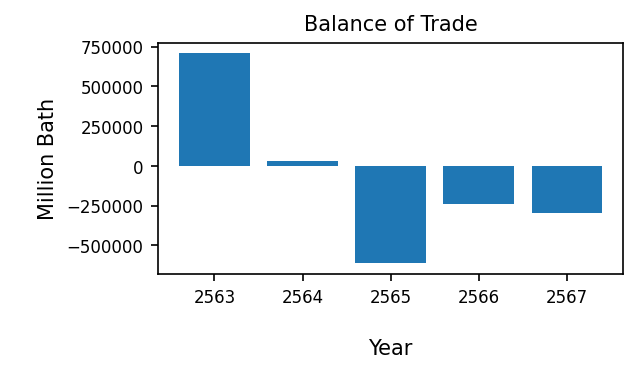

In [324]:
# ภาพที่ 1 ภาพแสดงดุลการค้าของของประเทศไทยระหว่างปี 2563 ถึง 2567 line ???? (หน่วย : ล้านล้านบาท)
import matplotlib.pyplot as plt
import pandas as pd


data_inter_trade = data_inter_trade[:]
plt.figure(figsize=(4,2),dpi=150)
plt.bar(x=data_inter_trade['Year'],
       height=data_inter_trade['Balance of Trade'])
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')
plt.xlabel('\nYear',fontsize=10)
plt.ylabel('\nMillion Bath',fontsize=10)
plt.title('Balance of Trade',fontsize=10)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

plt.savefig("Balance of Trade.png", dpi=150, bbox_inches="tight")
files.download("Balance of Trade.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

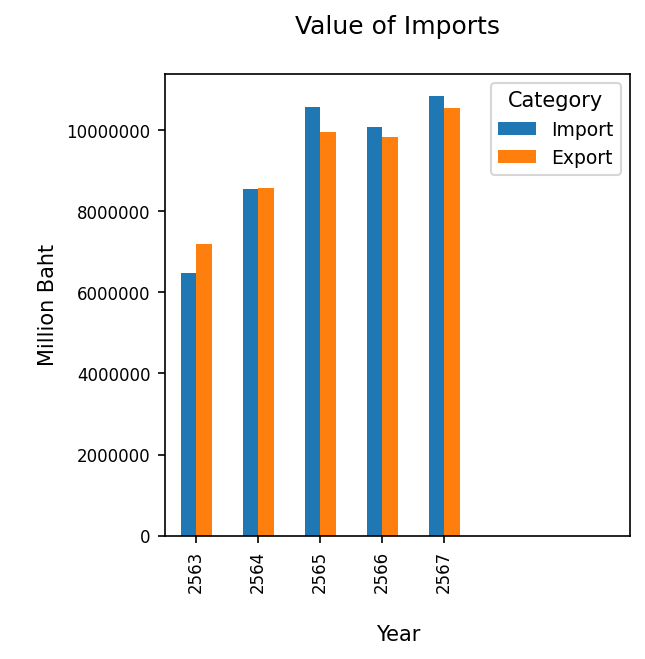

In [325]:
# ภาพที่ 2 : ภาพแสดงมูลค่าการนำเข้าของประเทศไทยระหว่างปี 2563 ถึง 2567 (หน่วย : ล้านล้านบาท)

import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(4,4),dpi=150)
ax = plt.gca()

data_inter_trade.plot(
    x='Year',y=['Import'	,'Export'], kind='bar', ax=ax,
)

left, right = ax.get_xlim()
ax.set_xlim(left, right+2.5)
ax.set_title("Value of Imports\n",fontsize=12)
ax.set_ylabel("\nMillion Baht",fontsize=10)
ax.set_xlabel("\nYear",fontsize=10)
ax.legend(title="Category", fontsize=9, title_fontsize=10)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.ticklabel_format(style='plain', axis='y')

plt.savefig("Value_of_Imports.png", dpi=150, bbox_inches="tight")
files.download("Value_of_Imports.png")


# การวิเคราะห์มูลค่าการนำเข้า

In [326]:
data_Imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item         391 non-null    object 
 1   Category     391 non-null    object 
 2   Subcategory  391 non-null    object 
 3   2563         377 non-null    float64
 4   2564         377 non-null    float64
 5   2565         391 non-null    float64
 6   2566         391 non-null    float64
 7   2567         391 non-null    float64
dtypes: float64(5), object(3)
memory usage: 24.6+ KB


ภาพรวมการนำเข้า

In [327]:
data_Imports = data_Imports[data_Imports['Subcategory'] != 'None']

In [328]:
data_Imports[(data_Imports['Category'] != 'N/A') & (data_Imports['Subcategory'] == 'N/A')]

,Item,Category,Subcategory,2563,2564,2565,2566,2567
2,1.1 Crude oil,Fuel lubricants,N/A,504683.05,753463.05,1261981.29,1123134.70,1114333.77
3,1.2 Finished oils,Fuel lubricants,N/A,103397.96,171699.50,201483.76,151932.05,133912.98
9,1.3 Natural gas,Fuel lubricants,N/A,128493.77,190616.48,445865.95,400465.91,338417.94
12,1.4 Coal,Fuel lubricants,N/A,41933.99,59109.30,94997.01,60983.28,57930.06
13,1.5 Other fuel,Fuel lubricants,N/A,71028.79,83137.38,96683.86,91234.01,96040.09
...,...,...,...,...,...,...,...,...
380,5.6 Bicycles,Vehicles and transport accessories,N/A,1653.56,2122.84,1733.76,1321.38,1396.20
381,5.7 Parts and accessories of motorcycles and b...,Vehicles and transport accessories,N/A,21052.54,33065.13,40148.38,33151.66,28562.24
383,6.1 Munitions used in official services,Arms munitions used in official services and o...,N/A,66203.35,10341.98,15046.75,17203.47,7721.99
387,6.2 Special transaction,Arms munitions used in official services and o...,N/A,0.00,0.00,0.00,0.00,0.00


In [329]:
# ตารางที่ 3 : ตารางแสดงมูลค่าการนำเข้าจำแนกตามประเภทสินค้า

data_Imports[((data_Imports['Category']== 'Capital goods') | (data_Imports['Category']== 'Raw materials and intermediate products')) & (data_Imports['Subcategory'] == 'N/A')]

data_Imports_na = data_Imports[(data_Imports['Category'] != 'N/A') & (data_Imports['Subcategory'] == 'N/A')]

data_Imports_Category = data_Imports_na.groupby(['Category'])[['2563',	'2564',	'2565'	,'2566',	'2567']].sum().reset_index(drop=False)
data_Imports_Category_image = data_Imports_Category.sort_values(by='2567', ascending=False).reset_index(drop=True)
data_Imports_Category_image


,Category,2563,2564,2565,2566,2567
0,Raw materials and intermediate products,2626126.05,3714765.68,4418534.57,3963905.61,4534572.31
1,Capital goods,1749723.67,2088571.91,2338725.58,2425119.70,2751256.46
2,Fuel lubricants,849537.56,1258025.71,2101011.87,1827749.95,1740634.84
3,Consumer goods,819988.91,1005784.69,1143526.13,1154308.72,1249709.62
4,Vehicles and transport accessories,364427.52,462839.37,433076.66,553230.27,421170.69
5,Arms munitions used in official services and o...,66463.60,10774.91,134767.07,143428.97,154092.28


/tmp/ipython-input-316187573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Imports_Category_new['Category_new'] = data_Imports_Category['Category'].apply(lambda x: re.sub(r'((?:\S+\s+){1}\S+)', r'\1\n', x).strip())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

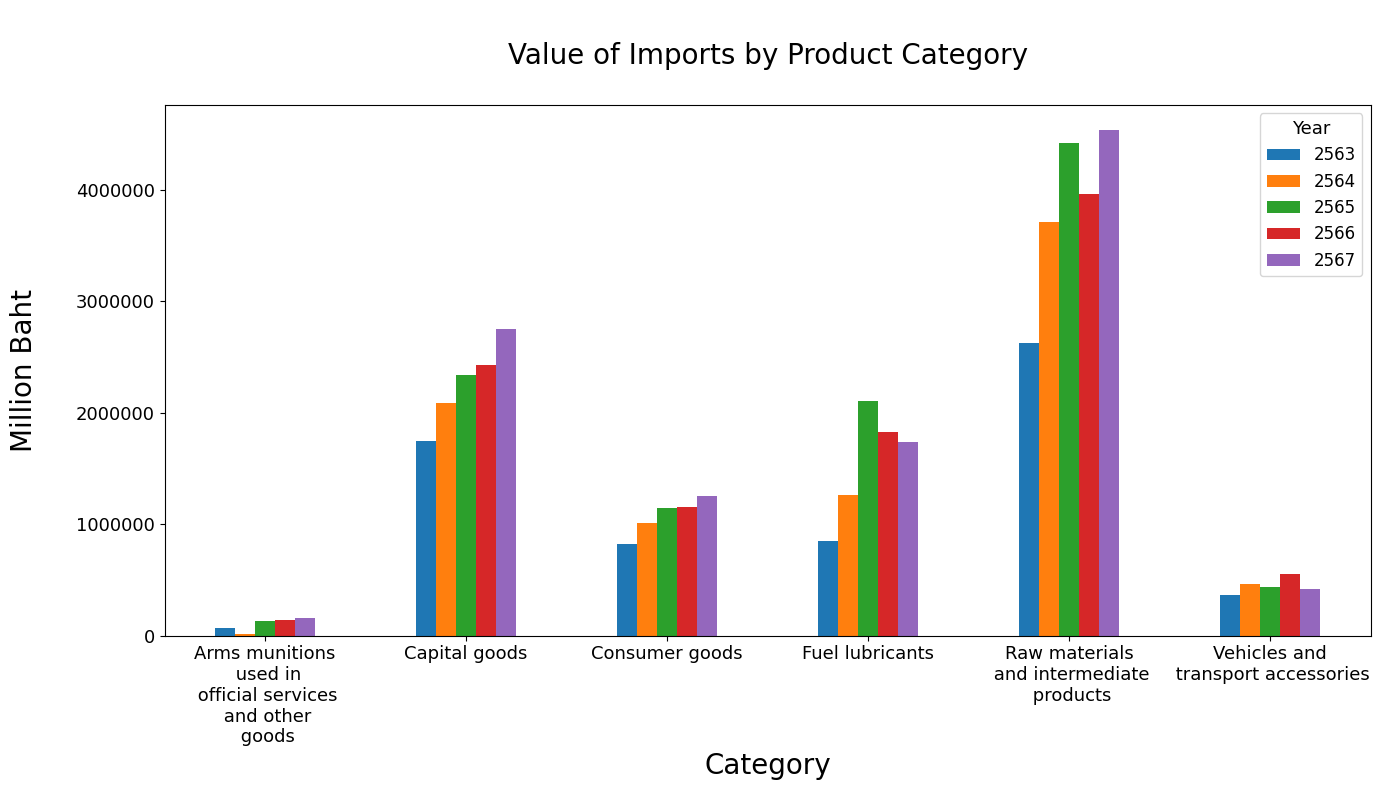

In [330]:
# ภาพที่ 3 : ภาพแสดงมูลค่าการนำเข้าจำแนกตามประเภทสินค้า (หน่วย : ล้านบาท)
import re
data_Imports_Category_new = data_Imports_Category[:]
data_Imports_Category_new['Category_new'] = data_Imports_Category['Category'].apply(lambda x: re.sub(r'((?:\S+\s+){1}\S+)', r'\1\n', x).strip())

Imports_graph = data_Imports_Category_new.plot(
    x='Category_new',
    y=['2563', '2564', '2565', '2566', '2567'],
    kind='bar',
    figsize=(14, 8)
)

Imports_graph.set_title("\nValue of Imports by Product Category\n",fontsize=20)
Imports_graph.set_ylabel("Million Baht\n",fontsize=20)
Imports_graph.set_xlabel("Category",fontsize=20)
Imports_graph.legend(title="Year", fontsize=12, title_fontsize=13)
Imports_graph.tick_params(axis='x', labelsize=13, labelrotation=360)
Imports_graph.tick_params(axis='y', labelsize=13)
Imports_graph.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

plt.savefig("Value of Imports by Product Category.png", dpi=150, bbox_inches="tight")
files.download("Value of Imports by Product Category.png")

In [331]:
# ตารางที่ 4 : ตารางแสดงสัดส่วนมูลค่าสินค้ารายประเภทกับมูลค่าการนำเข้าทั้งหมดระหว่างปี 2563 ถึง 2567

data_Imports_Category['proportion_import_63 (%)'] = (data_Imports_Category['2563'] *100 / data_Imports_Category['2563'].sum()).round(2)
data_Imports_Category['proportion_import_64 (%)'] = (data_Imports_Category['2564'] *100 / data_Imports_Category['2564'].sum()).round(2)
data_Imports_Category['proportion_import_65 (%)'] = (data_Imports_Category['2565'] *100 / data_Imports_Category['2565'].sum()).round(2)
data_Imports_Category['proportion_import_66 (%)'] = (data_Imports_Category['2566'] *100 / data_Imports_Category['2566'].sum()).round(2)
data_Imports_Category['proportion_import_67 (%)'] = (data_Imports_Category['2567'] *100 / data_Imports_Category['2567'].sum()).round(2)

data_Imports_Category_proportion = data_Imports_Category.iloc[:,[0,6,7,8,9,10]].sort_values(by='proportion_import_67 (%)', ascending=False).reset_index(drop=True)
data_Imports_Category_proportion.rename(columns={'proportion_import_63 (%)': '2563','proportion_import_64 (%)': '2564','proportion_import_65 (%)': '2565','proportion_import_66 (%)': '2566','proportion_import_67 (%)': '2567'}, inplace=True)
data_Imports_Category_proportion

,Category,2563,2564,2565,2566,2567
0,Raw materials and intermediate products,40.55,43.49,41.80,39.37,41.79
1,Capital goods,27.02,24.45,22.13,24.09,25.35
2,Fuel lubricants,13.12,14.73,19.88,18.15,16.04
3,Consumer goods,12.66,11.78,10.82,11.47,11.52
4,Vehicles and transport accessories,5.63,5.42,4.10,5.50,3.88
5,Arms munitions used in official services and o...,1.03,0.13,1.28,1.42,1.42


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

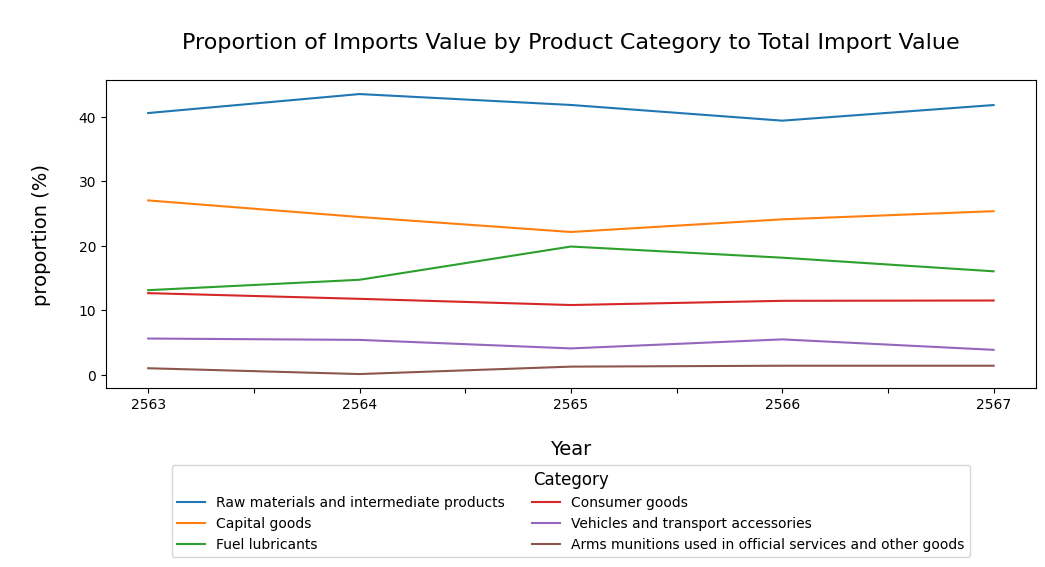

In [332]:
# ภาพที่ 4 : ภาพแสดงสัดส่วนของมูลค่าสินค้านำเข้าประเภทต่าง ๆ กับมูลค่านำเข้าสินค้ารวมระหว่างปี 2563 ถึง 2567

data_Imports_Category_proportion = data_Imports_Category_proportion.set_index('Category').T

ax = data_Imports_Category_proportion.plot(
    kind='line',
    figsize=(12, 4)
)

ax.set_title("\nProportion of Imports Value by Product Category to Total Import Value\n",fontsize=16)
ax.set_ylabel("\nproportion (%)\n",fontsize=14)
ax.set_xlabel("\nYear",fontsize=14)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(
    title="Category",
    fontsize=10,
    title_fontsize=12,
    bbox_to_anchor=(0.5, -0.25),
    loc='upper center',
    borderaxespad=0.,
    ncol=2
)
plt.savefig("Proportion of Import Value by Product Category to Total Import Value.png", dpi=150, bbox_inches="tight")
files.download("Proportion of Import Value by Product Category to Total Import Value.png")

In [333]:
Subcategory = data_Imports[:]

In [334]:
Subcategory_data = Subcategory[(Subcategory['Category'] == 'Raw materials and intermediate products' )& (Subcategory['Subcategory'] == 'N/A')]
Subcategory_data = Subcategory_data.reset_index(drop=True)

In [335]:
Subcategory = data_Imports[:]

Subcategory.loc[Subcategory['Item'] == '3.15 Cathode-ray tubes and parts','Subcategory'] = 'Cathode-ray tubes and parts'
Subcategory.loc[Subcategory['Item'] == '3.20 Cement','Subcategory'] = 'Cement'
Subcategory.loc[Subcategory['Item'] == '3.21 Cement, asbestos, mica and products thereof','Subcategory'] = 'Cement, asbestos, mica and products thereof'
Subcategory.loc[Subcategory['Item'] == '3.22 Ceramic products','Subcategory'] = 'Ceramic products'
Subcategory.loc[Subcategory['Item'] == '3.25 Other raw materials and semifinished products','Subcategory'] = 'Other raw materials and semifinished products'

Subcategory_data = Subcategory[(Subcategory['Category'] == 'Raw materials and intermediate products' )& (Subcategory['Subcategory'] != 'N/A')]
Subcategory_data = Subcategory_data[Subcategory_data['Subcategory'] != 'None'].reset_index(drop=True)



In [336]:
Subcategory_sum = Subcategory_data.groupby('Subcategory')[['2563',	'2564',	'2565',	'2566'	,'2567']].sum().reset_index()

การนำเข้าวัตถุดิบและสินค้าขั้นกลาง

In [337]:
# ตารางที่ 5 : ตารางแสดงมูลค่าการนำเข้าสูงสุดอย่างมีนัยสำคัญของมูลค่าการนำเข้าวัตถุดิบและสินค้าขั้นกลางระหว่างปี 2563 ถึง 2567

Subcategory_sum_sort = Subcategory_sum.sort_values(by='2567', ascending=False).reset_index(drop=True).head(6)
Subcategory_sum_sort

,Subcategory,2563,2564,2565,2566,2567
0,"Electrical, electronic equipment and parts the...",504218.77,646351.71,863737.51,889938.72,1090432.18
1,Jewellery including silver bars and gold,234503.60,378746.96,549570.44,416334.51,687610.87
2,Chemicals,453420.16,660115.11,736255.33,621225.95,630184.61
3,"Other metal ores, metal waste scrap, and products",254553.01,414434.42,472233.00,391669.45,460114.64
4,"Iron, steel and products",321269.96,526627.84,544038.83,459045.53,435058.51
5,Vegetables and vegetable products,225422.91,292296.28,308061.00,339850.89,333808.46


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

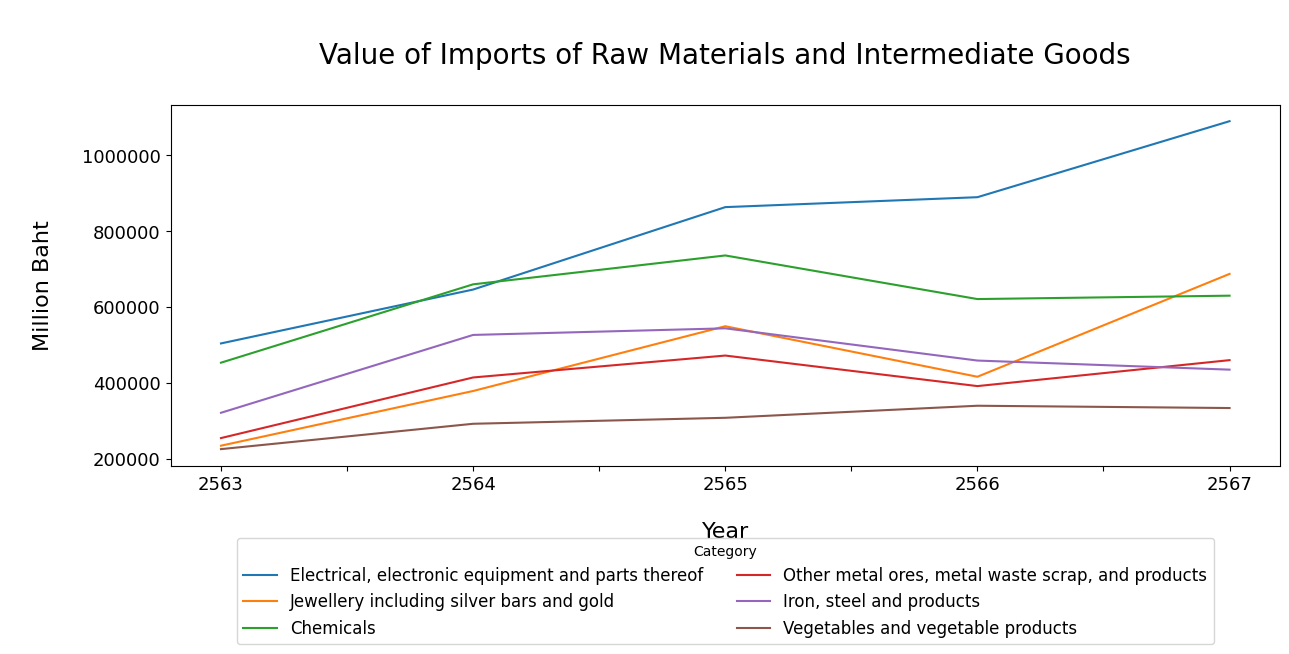

In [338]:
# ภาพที่ 5 : ภาพแสดงมูลค่าการนำเข้าสูงสุดอย่างมีนัยสำคัญของมูลค่าการนำเข้าวัตถุดิบและสินค้าขั้นกลางระหว่างปี 2563 ถึง 2567

Subcategory_sum_sort_plot = Subcategory_sum_sort.set_index('Subcategory').T
Subcategory_sum_sort_plot

ax = Subcategory_sum_sort_plot.plot(
    kind='line',
    figsize=(13, 7)
)

ax.set_title("\nValue of Imports of Raw Materials and Intermediate Goods\n",fontsize=20)
ax.set_ylabel("\nMillion Baht\n",fontsize=16)
ax.set_xlabel("\nYear",fontsize=16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(
    title="Category",
    fontsize=12,
    title_fontsize=10,
    bbox_to_anchor=(0.5, -0.2),
    loc='upper center',
    borderaxespad=0.,
    ncol=2
)

ax.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

plt.savefig("Value of Import of Raw Materials and Intermediate Goods.png", dpi=150, bbox_inches="tight")
files.download("Value of Import of Raw Materials and Intermediate Goods.png")

In [339]:
# ตารางที่ 6 ตารางแสดงมูลค่าการนำเข้าของสอนค้าในหมวดอุปกรณ์ ส่วนประกอบเครื่องใช้ไฟฟ้าและอิเล็กทรอนิกส์
Subcategory = Subcategory[:]
Subcategory_Electrical = Subcategory[Subcategory['Subcategory'] == 'Electrical, electronic equipment and parts thereof']
Subcategory_Electrical["Onlyitem"] = Subcategory_Electrical["Item"].str.replace(r'^[\d\.\s]+', '', regex=True)
Subcategory_Electrical = Subcategory_Electrical[["Onlyitem"] + [col for col in Subcategory_Electrical.columns if col not in ['Onlyitem','Item',	'Category',	'Subcategory'] ]]
Subcategory_Electrical.rename(columns={"Onlyitem": "Item"}).sort_values(by='2567', ascending=False).reset_index(drop=True)


/tmp/ipython-input-2687874849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subcategory_Electrical["Onlyitem"] = Subcategory_Electrical["Item"].str.replace(r'^[\d\.\s]+', '', regex=True)


,Item,2563,2564,2565,2566,2567
0,Electronic integrated circuits,384674.33,484804.45,669575.44,684263.34,869158.24
1,"Diodes, transistors and semi conductor",60975.64,81527.55,101028.43,124718.83,108704.15
2,Printed circuits,45764.57,64006.84,76638.41,69356.64,96682.04
3,"Data media for picture, sound recording",11067.87,13948.96,14066.96,9443.00,13621.29
4,"Batteries, Primary cells, and Components",1736.36,2063.91,2428.27,2156.91,2266.46


การนำเข้าสินค้าทุน

In [340]:
data_capital = data_Imports[(data_Imports['Category']=='Capital goods') & (data_Imports['Subcategory'] !='N/A')]

In [341]:
data_Imports[(data_Imports['Category']=='Capital goods') & (data_Imports['Subcategory'] =='Machinery and parts')].reset_index()


,index,Item,Category,Subcategory,2563,2564,2565,2566,2567
0,44,2.4.1 Machines for agricultural use,Capital goods,Machinery and parts,9391.31,13326.03,13352.63,12121.34,11022.24
1,45,2.4.2 Tractors and parts,Capital goods,Machinery and parts,6838.39,12380.36,15954.73,14703.51,14111.24
2,46,2.4.3 Machinery for industrial use and parts,Capital goods,Machinery and parts,489423.55,573414.39,623259.82,637299.14,652437.83
3,59,2.4.4 Other machinery and parts,Capital goods,Machinery and parts,63347.45,71246.96,74618.45,76986.93,102486.70


In [342]:
data_capital_sum = data_capital.groupby('Subcategory')[['2563',	'2564',	'2565',	'2566'	,'2567']].sum().reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

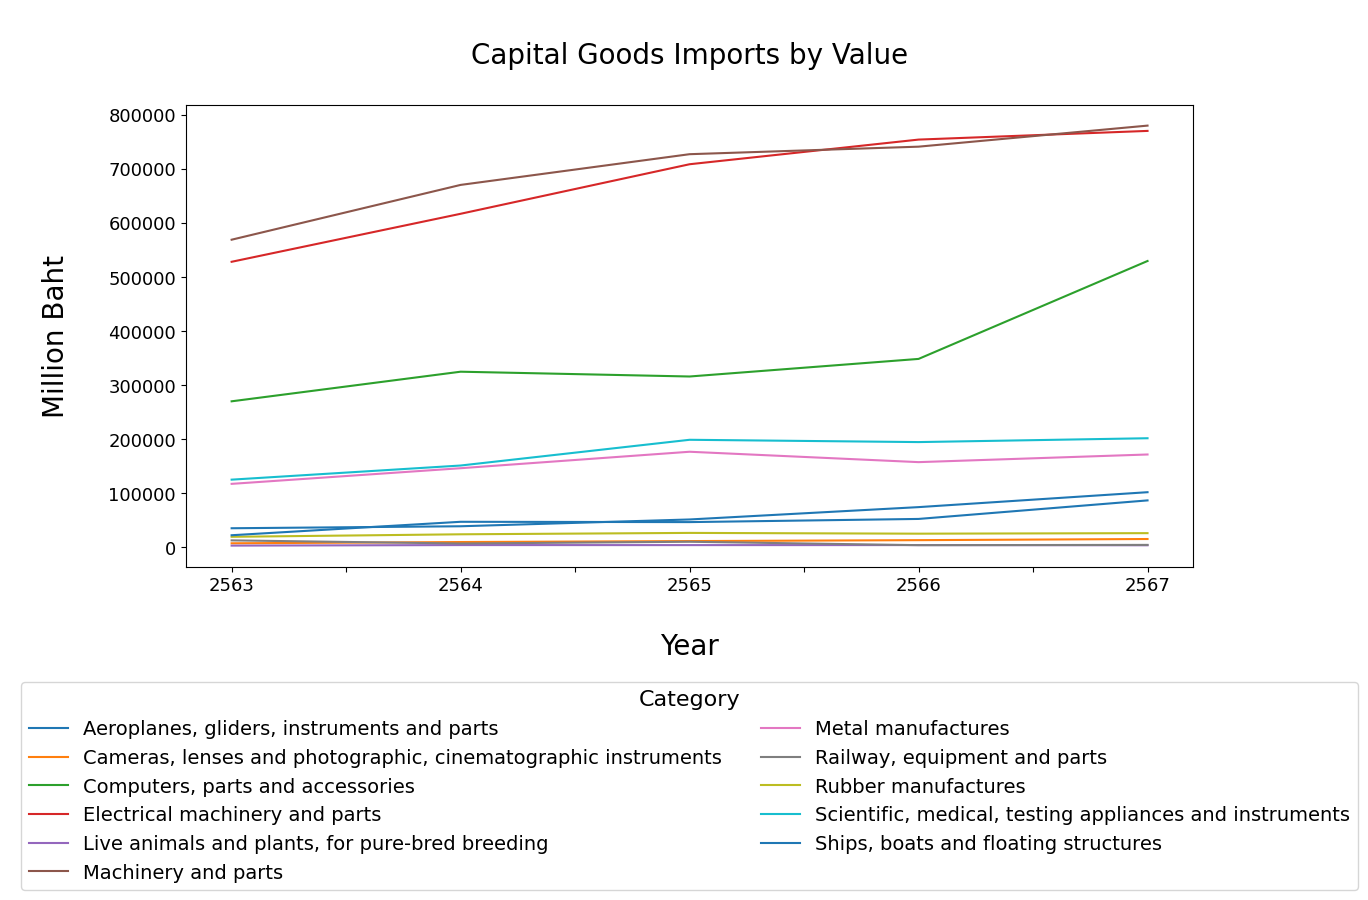

In [343]:
data_capital_plot = data_capital_sum.set_index('Subcategory').T
ax = data_capital_plot.plot(
    #y=['Arms munitions used inofficial services and other goods',	'Capital goods',	'Consumer goods',	'Fuel lubricants',	'Raw materials and intermediate products',	'Vehicles and transport accessories'],
    kind='line',
    figsize=(13, 6)
)

ax.set_title("\nCapital Goods Imports by Value\n",fontsize=20)
ax.set_ylabel("\nMillion Baht\n",fontsize=20)
ax.set_xlabel("\nYear",fontsize=20)
ax.legend(title="Category",fontsize=14,
    title_fontsize=16,
    bbox_to_anchor=(0.5, -0.25),
    loc='upper center',
    borderaxespad=0.,
    ncol=2
)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

plt.savefig("Capital Goods Imports by Value.png", dpi=150, bbox_inches="tight")
files.download("Capital Goods Imports by Value.png")

In [344]:
data = data_capital_sum.sort_values(by='2567', ascending=False).reset_index(drop=True).head(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

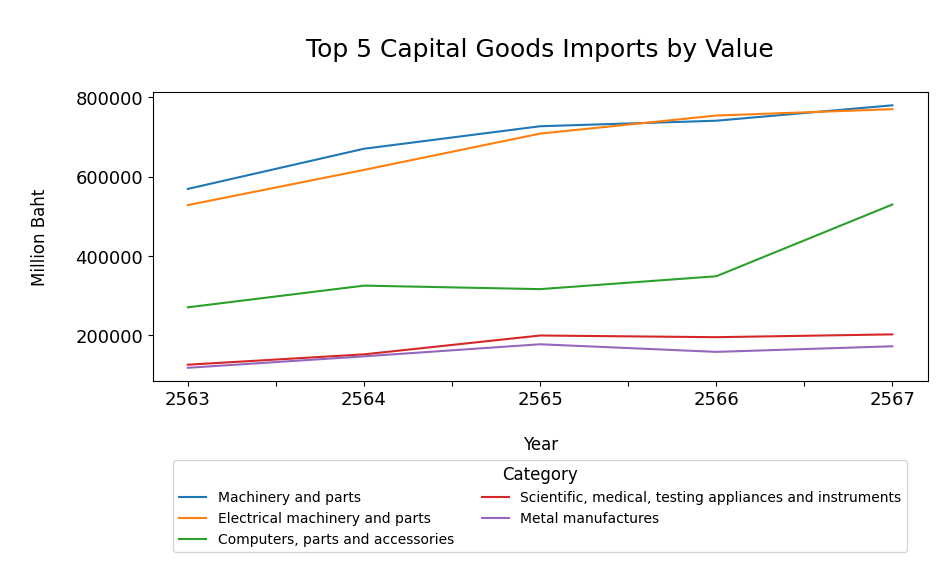

In [345]:
# ภาพที่ 6 : ภาพแสดงมูลค่าการนำเข้าสินค้า 5 อันดับแรกในสินค้าประเภทสินค้าทุนระหว่างปี 2563 ถึง 2567

data_capital_plot = data.set_index('Subcategory').T
ax = data_capital_plot.plot(
       kind='line',
      figsize=(10,3.75) )

ax.set_title("\nTop 5 Capital Goods Imports by Value\n",fontsize=18)
ax.set_ylabel("\nMillion Baht\n",fontsize=12)
ax.set_xlabel("\nYear",fontsize=12)
ax.legend(
    title="Category",
    fontsize=10,
    title_fontsize=12,
    bbox_to_anchor=(0.5, -0.25),
    loc='upper center',
    borderaxespad=0.5,
    ncol=2
)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

plt.savefig("Top 5 Capital Goods Imports by Value.png", dpi=150, bbox_inches="tight")
files.download("Top 5 Capital Goods Imports by Value.png")

In [346]:
# ตารางที่ 7 ตารางแสดงมูลค่าการนำเข้าสินค้า 5 อันดับแรกในสินค้าประเภทสินค้าทุนระหว่างปี 2563 ถึง 2567

data_Imports.loc[(data_Imports['Item'] == '2.12 Other capital goods'),'Subcategory'] = 'Other capital goods'
data_Imports[(data_Imports['Item'] == '2.12 Other capital goods')]

data_capital = data_Imports[(data_Imports['Category']=='Capital goods') & (data_Imports['Subcategory'] !='N/A')]
data_capital_sum = data_capital.groupby('Subcategory')[['2563',	'2564',	'2565',	'2566'	,'2567']].sum().reset_index()
data_capital_sum.sort_values(by='2567', ascending=False).reset_index(drop=True).head(5)


,Subcategory,2563,2564,2565,2566,2567
0,Machinery and parts,569000.70,670367.74,727185.63,741110.92,780058.01
1,Electrical machinery and parts,528151.84,616945.29,708599.68,754200.91,770266.36
2,"Computers, parts and accessories",270056.77,324823.19,315952.15,348479.41,529611.02
3,"Scientific, medical, testing appliances and in...",125146.52,151275.11,198885.80,194631.75,201741.67
4,Metal manufactures,117354.67,146293.08,176750.10,157545.97,171677.20


In [347]:
#ตารางที่ 8 ตารางแสดงมูลค่าการนำเข้าของสินค้าในหมวดหมู่เครื่องจักรกลและส่วนประกอบ

data_capital_Machinery = data_capital[data_capital['Subcategory'] =='Machinery and parts']
data_capital_Machinery["Onlyitem"] = data_capital_Machinery["Item"].str.replace(r'^[\d\.\s]+', '', regex=True)
data_capital_Machinery = data_capital_Machinery[["Onlyitem"] + [col for col in data_capital_Machinery.columns if col not in ['Onlyitem','Item',	'Category',	'Subcategory'] ]]
data_capital_Machinery.rename(columns={"Onlyitem": "Item"}).sort_values(by='2567', ascending=False).reset_index(drop=True).head(5)

#.sort_values(by='2567', ascending=False).reset_index(drop=True)

/tmp/ipython-input-1484960905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_capital_Machinery["Onlyitem"] = data_capital_Machinery["Item"].str.replace(r'^[\d\.\s]+', '', regex=True)


,Item,2563,2564,2565,2566,2567
0,Machinery for industrial use and parts,489423.55,573414.39,623259.82,637299.14,652437.83
1,Other machinery and parts,63347.45,71246.96,74618.45,76986.93,102486.70
2,Tractors and parts,6838.39,12380.36,15954.73,14703.51,14111.24
3,Machines for agricultural use,9391.31,13326.03,13352.63,12121.34,11022.24


In [348]:
#ตารางที่ 9 ตารางแสดงมูลค่าการนำเข้าของสินค้าในหมวดหมู่เครื่องจักรไฟฟ้าและส่วนประกอบ

data_capita_Electrical = data_capital[data_capital['Subcategory'] =='Electrical machinery and parts']
data_capita_Electrical["Onlyitem"] = data_capita_Electrical["Item"].str.replace(r'^[\d\.\s]+', '', regex=True)
data_capita_Electrical = data_capita_Electrical[["Onlyitem"] + [col for col in data_capita_Electrical.columns if col not in ['Onlyitem','Item',	'Category',	'Subcategory'] ]]
data_capita_Electrical.rename(columns={"Onlyitem": "Item"}).sort_values(by='2567', ascending=False).reset_index(drop=True).head(5)

/tmp/ipython-input-44974553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_capita_Electrical["Onlyitem"] = data_capita_Electrical["Item"].str.replace(r'^[\d\.\s]+', '', regex=True)


,Item,2563,2564,2565,2566,2567
0,Visual and sound signalling apparatus and parts,129208.99,161152.04,181223.25,226661.92,190472.28
1,Telecommunications equipment and accessories,137269.15,138077.62,150491.22,168387.14,173798.72
2,Electrical machinery used for telecommunication,107075.94,129788.07,154690.06,137861.25,165728.69
3,Electrical apparatus for switching or protecti...,66327.03,83443.87,102120.56,106219.33,122028.84
4,"Motors, generators and parts",45968.92,55708.02,58586.92,55586.68,58080.19
